<a href="https://colab.research.google.com/github/AroraAnshul301/EventMate/blob/main/Lab_Evaluation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target variable is continuous. Binarizing...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


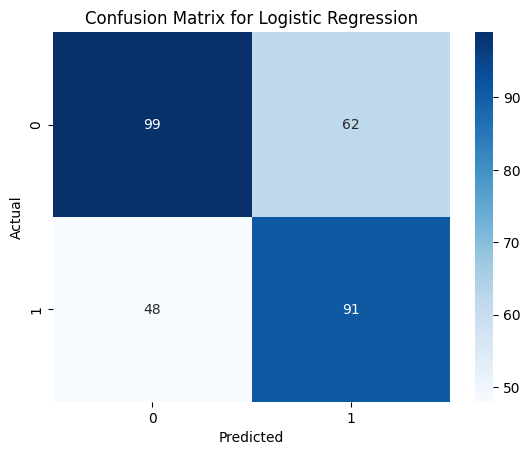

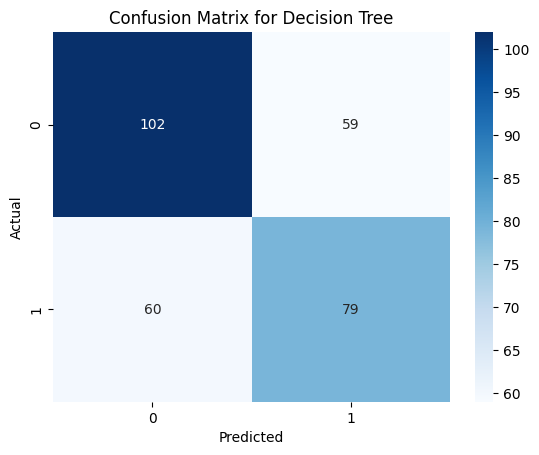

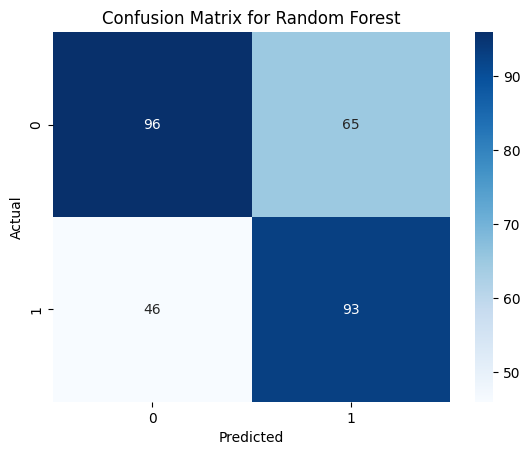

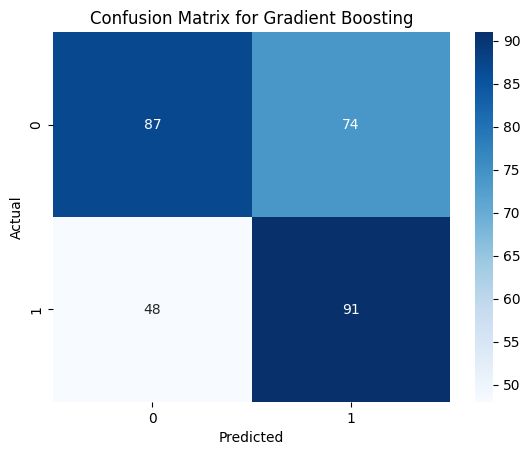

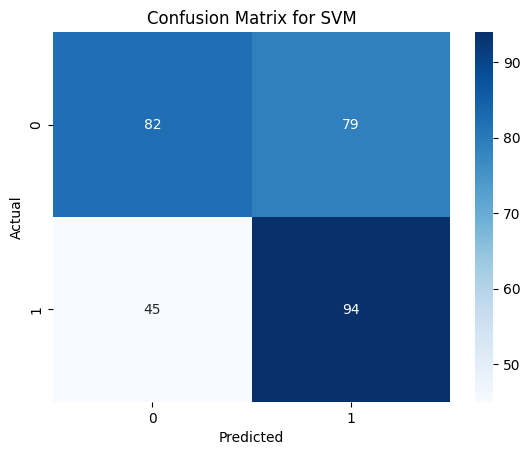

Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.633333   0.594771  0.654676  0.623288  0.704008
1        Decision Tree  0.603333   0.572464  0.568345  0.570397  0.600943
2        Random Forest  0.630000   0.588608  0.669065  0.626263  0.692033
3    Gradient Boosting  0.593333   0.551515  0.654676  0.598684  0.659323
4                  SVM  0.586667   0.543353  0.676259  0.602564  0.626525


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, Binarizer

data = pd.read_csv('/content/Fuel_cell_performance_data-Full.csv')

target = 'Target1'
X = data.drop(columns=[target])
y = data[target]

if y.dtypes in ['float64', 'int64'] and len(y.unique()) > 2:
    print("Target variable is continuous. Binarizing...")
    threshold = y.median()
    binarizer = Binarizer(threshold=threshold)
    y = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()
    if len(np.unique(y)) < 2:
        print("Binarization resulted in a single class. Adjusting threshold...")
        threshold = np.percentile(data[target], 75)
        binarizer = Binarizer(threshold=threshold)
        y = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}


results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

results_df = pd.DataFrame(results)

results_df.to_csv('model_results.csv', index=False)

print("Model Performance Summary:")
print(results_df)

